<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%88%98%ED%95%99_%EC%A4%91%EC%8B%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#통계
평균, 중간값, 사분위값, 최빈값, 분산, 표준편차

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
heights = np.random.normal(161.4,7,200) #정규 분포를 갖는 랜덤한 데이터 발생(평균:161.4, 표준편차:7, 개수:200)
bmi = np.random.normal(21,1,200) #체질량 지수
weights = bmi*(heights**2)/10000 #몸무게

In [5]:
print("=== 키 ===")
print("평균:",heights.mean())
print("중간값:",np.median(heights))
print("1/4분위값:",np.quantile(heights,0.25))
print("1/2분위값:",np.quantile(heights,0.55))
print("3/4분위값:",np.quantile(heights,0.75))
hist,_ = np.histogram(heights,bins=[x for x in range(0,250,5)]) #반환값: 히스토그램, bins
mi = hist.argmax() #최댓값이 있는 인덱스
print("최빈구간:",mi*5+0.25)

=== 키 ===
평균: 161.86964307537986
중간값: 161.65237218681688
1/4분위값: 156.22598652139186
1/2분위값: 162.99722303818857
3/4분위값: 167.3109844322416
최빈구간: 165.25


#공분산
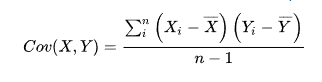

In [6]:
cv = np.cov(heights,weights)
print(cv)
print("공분산(키,키)",cv[0,0])
print("공분산(키,몸무게)",cv[0,1])
print("공분산(몸무게,키)",cv[1,0])
print("공분산(몸무게,몸무게)",cv[1,1])

[[57.16390421 39.98396349]
 [39.98396349 34.32274011]]
공분산(키,키) 57.163904209472676
공분산(키,몸무게) 39.98396349099023
공분산(몸무게,키) 39.98396349099023
공분산(몸무게,몸무게) 34.32274011387054


# 상관관계

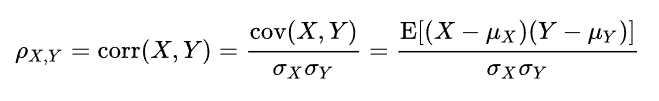

In [7]:
import pandas as pd
se_he = pd.Series(heights)
se_we = pd.Series(weights)
print(se_he.corr(se_we))

0.902680217489883


In [8]:
def correlation(x,y):
  std_x = x.std()
  std_y = y.std()
  if std_x>0 and std_y>0:
    return np.cov(x,y)[0,1]/(std_x*std_y)
  return 0

In [9]:
#다른 정의 방법 (위의 방법이 더 빠르다)
def correlation2(x,y):
  if x.std_x>0 and y.std_y>0:
    return np.cov(x,y)[0,1]/(x.std()*y.std())
  return 0

In [10]:
print(correlation(heights,weights))

0.907216298984807


#확률
조건부 사건  
P(a): a가 발생할 확률  
P(b): b가 발생할 확률  
P(a|b): b가 발생한 상태에서 a가 발생할 확률 - 조건부 확률  
P(a|b) = P(a) 일때, a와 b는 독립 사건이다

In [12]:
pa = 0.5 #동전을 던져서 앞면이 나올 확률
pb = 1/6 #주사위를 던졌을 때 1이 나올 확률

print(f"P(a) = {pa:.2f}")
print(f"P(b) = {pb:.2f}")
print("P(a and b) = P(a|b)*P(b)")
print("a와 b가 독립사건일 때,")
pab = pa*pb
print(f"P(a and b) = P(a|b)*P(b) = P(a)*P(b) = {pab:.2f}")

P(a) = 0.50
P(b) = 0.17
P(a and b) = P(a|b)*P(b)
a와 b가 독립사건일 때,
P(a and b) = P(a|b)*P(b) = P(a)*P(b) = 0.08


In [13]:
import math
logit_pab = math.log(pa) + math.log(pb)
print("a와 b가 독립 사건일 때")
print(f"logit(P(a and b)) = log(P(a|b)) + log(P(b)) = log(P(a)) + log(P(b)) = {logit_pab:.2f}")
inv_logit_pab = math.exp(logit_pab)
print(f"inv(logit(P(a and b)) = exp(logit(P(a and b))) = P(a and b) = {inv_logit_pab:.2f}")

logit(P(a and b)) = log(P(a|b)) + log(P(b)) = log(P(a)) + log(P(b)) = -2.48
inv(logit(P(a and b)) = exp(logit(P(a and b))) = P(a and b) = 0.08


#균등 분포 함수
주사위를 던졌을 때, 1,2,3,4,5,6이 나올 각각의 확률은 모두 1/6이다.

In [24]:
def uniform_pdf(x,min_v=0,max_v=1):
  if min_v <= x < max_v: #발생할 범위 내에 있다면
    return 1/(max_v-min_v) #
  return 0

#누적 균등 분포 함수

In [25]:
def uniform_cdf(x,min_v=0,max_v=1):
  if x<min_v:
    return 0
  if min_v <= x < max_v: #발생할 범위 내에 있다면
    return (x-min_v)/(max_v-min_v)  #누적범위/범위
  return 1 #x가 max_v보다 크다면 누적값은 1

In [26]:
xs=[]
pys=[] #균등분포를 보관할 컬렉션
cys=[] #누적균등분포를 보관할 컬렉션
for x in range(-10,10):
  pys.append(uniform_pdf(x,1,7))
  cys.append(uniform_cdf(x,1,7))
  xs.append(x)

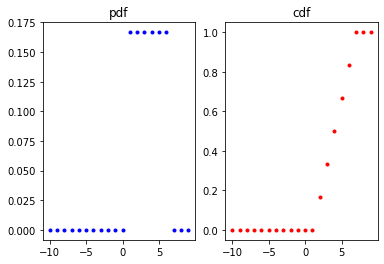

In [27]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r.",label="cdf")
ax[0].set_title("pdf")
ax[1].set_title("cdf")
plt.show()

In [29]:
data = np.linspace(0,100,21)
print(data)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


#정규분포
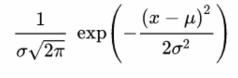

In [31]:
def normal_pdf(x,mu=0,sigma=1): #확률 이론에서의 정규분포, mu: 기대값(평균), sigma: 표준편차
  pre = 1/(sigma*math.sqrt(2*math.pi))
  post = math.exp(-((x-mu)**2/(2*(sigma**2))))
  return pre*post

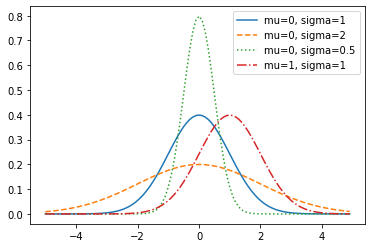

In [33]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_pdf(x) for x in xs]
ys2 = [normal_pdf(x, sigma=2) for x in xs]
ys3 = [normal_pdf(x, sigma=0.5) for x in xs]
ys4 = [normal_pdf(x, mu=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0, sigma=1")
plt.plot(xs,ys2,'--',label="mu=0, sigma=2")
plt.plot(xs,ys3,':',label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-.',label="mu=1, sigma=1")
plt.legend()
plt.show()

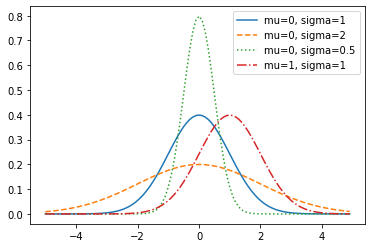

In [34]:
import scipy.stats as st

#평균은 loc, 표준편차는 scale
xs = [x/10.0 for x in range(-50,50)]
ys1 = [st.norm.pdf(x, scale=1) for x in xs]
ys2 = [st.norm.pdf(x, scale=2) for x in xs]
ys3 = [st.norm.pdf(x, scale=0.5) for x in xs]
ys4 = [st.norm.pdf(x, loc=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0, sigma=1")
plt.plot(xs,ys2,'--',label="mu=0, sigma=2")
plt.plot(xs,ys3,':',label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-.',label="mu=1, sigma=1")
plt.legend()
plt.show()

#누적정규분포

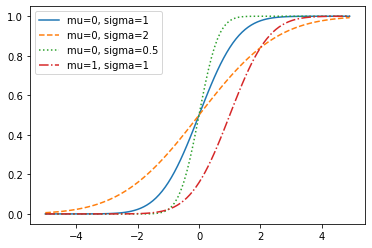

In [35]:
#평균은 loc, 표준편차는 scale
xs = [x/10.0 for x in range(-50,50)]
ys1 = [st.norm.cdf(x, scale=1) for x in xs]
ys2 = [st.norm.cdf(x, scale=2) for x in xs]
ys3 = [st.norm.cdf(x, scale=0.5) for x in xs]
ys4 = [st.norm.cdf(x, loc=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0, sigma=1")
plt.plot(xs,ys2,'--',label="mu=0, sigma=2")
plt.plot(xs,ys3,':',label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-.',label="mu=1, sigma=1")
plt.legend()
plt.show()

#코딩테스트(TF-IDF)

언휴는 eh 도서관의 사서입니다.

고객이 많아지면서 언휴에게 책을 찾아달라는 요청도 많아졌어요.

이제 원하는 책을 찾는 것을 프로그램으로 제작해 보려고 합니다.

책을 찾을 때 원하는 질의를 입력하면 연관성이 높은지 점수를 부여할 거예요.

점수는 책 내에 질의가 나오는 빈도와 질의의 희귀도를 조합하에 계산합니다.

예를 들어 책 A에 전체 단어 수가 100개이고 질의가 3번 나오면 빈도 점수는 3/100입니다.

####**빈도 점수 = 질의 빈도/책에 단어 수**

전체 책이 50권이고 질의를 포함하는 책이 6권이면 희귀도는 log2(50/(6+1))입니다.

####**희귀도(idf) = log2((전체 책 수+1)/(질의 포함 책 수+1))**

log2는 밑수가 2인 로그를 의미합니다.

책에 부여하는 연관성 점수는 희귀도 점수가 0일 때는 빈도 점수입니다.

*연관성 점수 = 빈도 점수* : 희귀도 점수가 0일 때

희귀도 점수가 0이 아닐 때는 빈도 점수 * 희귀도 입니다.

연관성 점수 = 빈도 점수 * 희귀도 :희귀도 점수가 0이 아닐 때

입력은 책 내용 목록(문자열을 원소로 하는 리스트)와 검색 질의(문자열)이 주어집니다.

출력(반환)은 점수 목록입니다.

단어는 공백을 기준으로 구분합니다.

입력: ["abc korea bbc dde zzz","abc hello yahoo","korea python korea yahoo abc","hello korea","yahoo","hello","world"],"korea"

출력: [0.2, 0.0, 0.4, 0.5, 0.0, 0.0, 0.0]

In [58]:
def ranking(books,query):
  #1. DF값을 구한다
  #1-1. 문서 개수를 구한다
  dcnt = len(books)
  #print(dcnt) - 단위테스트 

  #1-2. 질의를 포함하는 문서 개수를 구한다
  dref = 0 #참조(문서) 개수를 0으로 초기화
  for book in books:
    if query in book:
      dref += 1
  #print(dref)

  #1-3. 1-1,1-2에서 구한 값을 이용하여 idf값을 산출한다.
  idf = math.log((dcnt+1)/(dref+1),2)
  #print(idf)

  #2. 모든 책들 마다 TF값을 구한다
  scores = [] #socres값을 보관할 컬렉션 
  #2-1. 반복문 사용(모든 책들을 순차적으로)
  for book in books:
    #2-1-1. 책의 내용을 단어별로 분리
    svs = str.split(book)
    #print(svs)
    #2-1-2. 반복문(해당 책의 모든 단어를 순차적으로)
    tref=0 #참조(단어) 카운터를 0으로 초기화
    for word in svs:
      #2-1-2.a. 질의와 단어가 일치하면 카운터 증가
      if word == query:
        tref += 1
    #2-1-3. tf값을 계산
    tf = tref/len(svs)
    #2-1-4. tf*idf값을 계산
    score = tf*idf
    scores.append(score)

  return scores  #구현하시오

In [59]:
re = ranking(["abc korea bbc dde zzz","abc hello yahoo","korea python korea yahoo abc","hello korea","yahoo","hello","world"],"korea") 
print("결과:",re)
print("정답:",[0.2, 0.0, 0.4, 0.5, 0.0, 0.0, 0.0])

결과: [0.2, 0.0, 0.4, 0.5, 0.0, 0.0, 0.0]
정답: [0.2, 0.0, 0.4, 0.5, 0.0, 0.0, 0.0]


#베르누이 시행

In [60]:
def bernouli_trial(p):
  return 1 if np.random.random()<p else 0

In [63]:
def draw_dice(n=1000,cade=1):
  cnt = 0
  for _ in range(n): #n번 실행
    re = bernouli_trial(1/6)
    if re == 1:
      cnt += 1
  return cnt

In [64]:
cnt = draw_dice(n=100000)
print(cnt/1000,1/6)

16.642 0.16666666666666666


#softmax

다항 분류의 문제세어 logistic 회귀를 이용하는 기법  
발생할 수 있는 case가 n개일 때,  
각 사건을 c_i라고 가정하자  
c_1일 확률은 logistic 회귀로 판단한 결과가 P(c_1)  
c_2일 확률은 logistic 회귀로 판단한 결과가 P(c_2)  
c_3일 확률은 logistic 회귀로 판단한 결과가 P(c_3)  
c_4일 확률은 logistic 회귀로 판단한 결과가 P(c_4)  
이라고 하자.  

이론적으로 보았을 때, 아래의 수식이 참이어야 한다.  
P(c_1) + P(c_2) + ... + P(n-1) + P(n) = 1  

하지만 실제 수행해 보면 1이 아닌 값일 수 있다.  
이 때, s = P(c_1) + P(c_2) + ... + P(n-1) + P(n)  

다음처럼 수정한 값으로 확률을 결정하는 것을 softmax라 한다.  
c_1일 확률을 P(c_1)/s 로 수정  
c_2일 확률을 P(c_2)/s 로 수정  
c_3일 확률을 P(c_3)/s 로 수정  
c_i일 확률을 P(c_i)/s 로 수정  

분자의 합은 P(c_1) + P(c_2) +...+ P(n)이고  
분모는 s = P(c_1) + P(c_2) +...+P(n)이므로  
분자/분모 = 1이 된다.


In [65]:
c_1 = draw_dice(cade=1)/1000
c_2 = draw_dice(cade=2)/1000
c_3 = draw_dice(cade=3)/1000
c_4 = draw_dice(cade=4)/1000
c_5 = draw_dice(cade=5)/1000
c_6 = draw_dice(cade=6)/1000
s = (c_1+c_2+c_3+c_4+c_5+c_6)
print(s)

cj_1 = c_1/s
cj_2 = c_2/s
cj_3 = c_3/s
cj_4 = c_4/s
cj_5 = c_5/s
cj_6 = c_6/s
sj = (cj_1+cj_2+cj_3+cj_4+cj_5+cj_6)
print(sj)

0.922
1.0


#ML관련

- 경사하강법을 이용한 선형 회귀  
  - Concept - 선형 회귀 함수에 의한 예측 값과 실제 값 사이의 차이가 최소가 되도록 하자.  
  - 손실함수(loss function) : 예측값과 실제값의 차이를 계산하는 함수  
    - MAE : 절대값(예측값 - 실제값)의 평균을 계산
    - MSE : (예측값 - 실제값)X(예측값 - 실제값)의 평균을 계산  
      손실 함수를 MSE를 사용했을 때,  
      mse = sum((wx+b)-y)((wx+b)-y)   
      -> 곡선의 형태를 갖는다.  
      -> 곡선에서 맨 밑바닥이 mse가 최소인 지점이며, 이는 미분을 이용하여 경사의 바닥을 찾는 경사하닥법을 이용할 수 있다.  

      dsw/dw = sum(2(wx+b)-y) * x  
      dsw/db = sum(2(wx+b)-y)  
- 로지스틱 회귀  
- KNN 회귀  
- KNN 분류  
  - KNN 회귀와 분류의 공통점 : 거리를 계산  
- softmax를 이용한 다항 분류  
- KMeans를 이용한 군집화  

로지스틱 회귀 - 시그모이드 함수 참고  
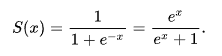

# Deep Learning 관련

- 퍼셉트론  
- Convolution  
- Pooling  
- 자연어 연구(Text Mining TF-IDF)  
